In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:

pylab.rcParams['figure.figsize'] = (10, 8)
from vwap_strategy import VWAPMomentum
from pyalgotrade.bitstamp import broker
from pyalgotrade import bar
from pyalgotrade import strategy
from pyalgotrade import plotter
from pyalgotrade.barfeed import csvfeed

shouldPlot=True

instrument = "BTC"
year = 2016
initialCash = 1000
vwapWindowSize = 101
buyThreshold = 0.01
sellThreshold = 0.022
#vwapWindowSize = 100
#buyThreshold = 0.007
#sellThreshold = 0.014

barFeed = csvfeed.GenericBarFeed(bar.Frequency.MINUTE*30)
barFeed.addBarsFromCSV(instrument, "5min-%s-%s.csv" % (instrument,year))
brk = broker.BacktestingBroker(initialCash, barFeed)
strat = VWAPMomentum(barFeed, instrument,initialCash, vwapWindowSize, buyThreshold, sellThreshold)
if shouldPlot:
    plt = plotter.StrategyPlotter(strat)
    plt.getInstrumentSubplot(instrument).addDataSeries("VWAP", strat.getVWAP())

strat.run()




2016-01-07 02:40:00 strategy [INFO] Buy -  FILLED - 2016-01-07 02:40:00 - Price: 440.0 - Amount: 2.227 - Fee: 0.0
2016-01-07 02:45:00 strategy [INFO] Buy -  FILLED - 2016-01-07 02:45:00 - Price: 438.45 - Amount: 0.045 - Fee: 0.0
2016-01-13 00:00:00 strategy [INFO] Sell -  FILLED - 2016-01-13 00:00:00 - Price: 434.01 - Amount: 2.272 - Fee: 0.0
2016-01-16 10:55:00 strategy [INFO] Buy -  FILLED - 2016-01-16 10:55:00 - Price: 371.25 - Amount: 2.604 - Fee: 0.0
2016-01-16 11:00:00 strategy [INFO] Buy -  FILLED - 2016-01-16 11:00:00 - Price: 371.3 - Amount: 0.052 - Fee: 0.0
2016-01-22 04:55:00 strategy [INFO] Sell -  FILLED - 2016-01-22 04:55:00 - Price: 396.1 - Amount: 2.656 - Fee: 0.0
2016-01-23 00:30:00 strategy [INFO] Buy -  FILLED - 2016-01-23 00:30:00 - Price: 386.78 - Amount: 2.667 - Fee: 0.0
2016-01-23 00:35:00 strategy [INFO] Buy -  FILLED - 2016-01-23 00:35:00 - Price: 386.36 - Amount: 0.053 - Fee: 0.0
2016-01-28 02:45:00 strategy [INFO] Sell -  FILLED - 2016-01-28 02:45:00 - Price:

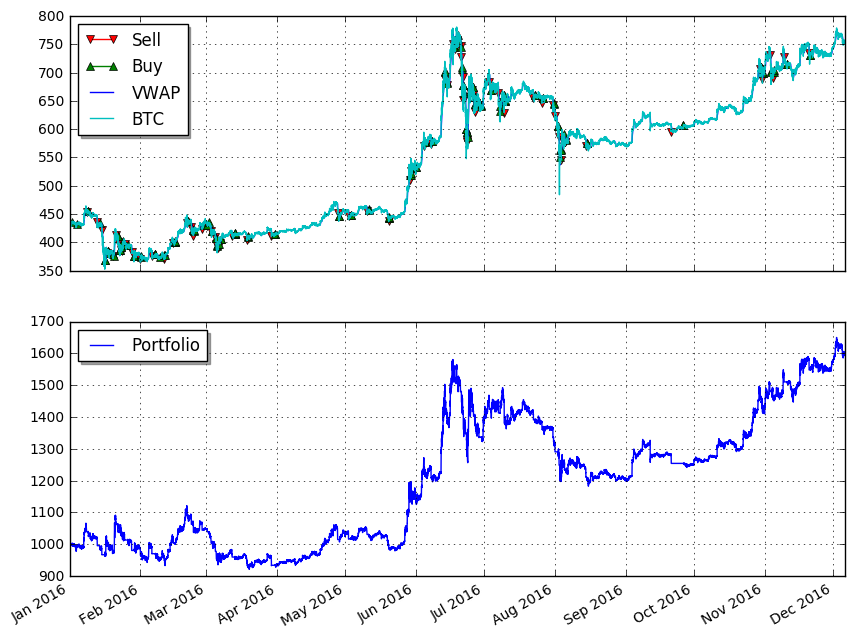

In [27]:


if shouldPlot:
    plt.plot()

In [25]:
growthHold = [(432.0-381.0)/381.0,(750.0 -290)/290.0]
# parameters ('BTC', 1000, 100, 0.02, 0.01)
diffPort = [(1550.0-1000)/1000,(1475.0-1000.0) /1000.0]
# parameters ('BTC', 1000, 100, 0.007, 0.014)

bestSoFar = [(2000.0-1000.0)/1000.0, (2150.0-1000.0) /1000.0, (3150.0-1000.0) /1000.0 ]
print "2015 BuyHold: %s%% DefaultVMS: %s%% BestSoFarVMS: %s%%" % (growthHold[0] * 100 ,diffPort[0]*100 ,bestSoFar[0]*100)  
print "2016 BuyHold: %s%% DefaultVMS: %s%% BestSoFarVMS: %s%%" % (growthHold[1] * 100 ,diffPort[1]*100 ,bestSoFar[1]*100)  


2015 BuyHold: 13.3858267717% DefaultVMS: 55.0% BestSoFarVMS: 100.0%
2016 BuyHold: 158.620689655% DefaultVMS: 47.5% BestSoFarVMS: 115.0%
